In [12]:
%matplotlib inline
pd.options.display.max_columns = 50

In [13]:
%cd nba

/Users/sinsanghun/nba


In [14]:
%ls

0001.csv  0304.csv  0607.csv  0910.csv  1213.csv  1516.csv  9899.csv
0102.csv  0405.csv  0708.csv  1011.csv  1314.csv  1617.csv  9900.csv
0203.csv  0506.csv  0809.csv  1112.csv  1415.csv  9798.csv


### 20개의 시즌 데이터를 불러와 리스트에 넣는다.

In [15]:
year1 = ["97", "98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16" ]
year2 = ["98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17" ]

season = []
for i in range(20):
    season.append(year1[i] + year2[i])
    
season        

['9798',
 '9899',
 '9900',
 '0001',
 '0102',
 '0203',
 '0304',
 '0405',
 '0506',
 '0607',
 '0708',
 '0809',
 '0910',
 '1011',
 '1112',
 '1213',
 '1314',
 '1415',
 '1516',
 '1617']

In [16]:
df = []
for i in season:
    df.append(pd.read_csv(i+".csv"))

In [17]:
df[0].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Mahmoud Abdul-Rauf\abdulma02,PG,28,SAC,31,0,17.1,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3
1,2,Tariq Abdul-Wahad\abdulta01,SG,23,SAC,59,16,16.3,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4
2,3,Shareef Abdur-Rahim\abdursh01,SF,21,VAN,82,82,36.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3
3,4,Cory Alexander\alexaco01,PG,24,TOT,60,22,21.6,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1
4,4,Cory Alexander\alexaco01,PG,24,SAS,37,3,13.5,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5


----------------

### 변수설명 
MP : 경기당 출전 시간(분) <br/>
3P : 경기당 성공시킨 3점슛 평균 갯수 <br/>
3PA : 경기당 3점슛 시도 평균 갯수 <br/>
3P% : 3점 성공률 <br/>
2P, FT(free throw)도 같은 맥락<br/>
eFG% : 3점슛이 2점슛보다 1점 더 가치가 있으므로 그에 해당되는 부분을 조정한 슛 성공률 <br/>
TRB : 평균 리바운드 갯수 = ORB(공격리바운드) + DRB(수비리바운드)<br/>
AST : 평균 어시스트 갯수 <br/>
STL : 평균 스틸 갯수 <br/>
BLK : 평균 블락 갯수 <br/>
TOV : 평균 턴오버 갯수 <br/>
PF : 경기당 평균 파울 갯수 <br/>
PS/G : 경기당 평균 득점 <br/>


### 포지션을 분류를 해보기 위한 작업이므로 이름이나 팀, 나이 같은 관련 없는 변수는 제거한다

In [18]:
for i in range(20):
    df[i] = df[i][["Pos", "GS", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "eFG%", "FT", "FTA", "FT%",
          "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PS/G"]]

### 20년 동안의 데이터를 합친다

In [19]:
temp = df[0]

# 9798 ~ 1516 년도 데이터를 train set으로 쓰고 
# 1617 데이터를 test set으로 사용하자 

for i in range(18):
    temp = pd.concat([temp, df[i+1]])
    
temp.shape

(10739, 24)

In [20]:
# index 정렬 
position = temp.set_index(np.arange(len(temp)))

In [21]:
position.groupby(["Pos"]).mean()

,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
Pos,,,,,,,,,,,,,,,,,,,,,,,
...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014 Draft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015 All-Star Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015 NBA Playoffs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9:56PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Active Assists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charlotte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dan Crawford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### C, PF, SF, SG, PG 를 빼고는 제외한다.

In [22]:
position2 = position[(position["Pos"] == "C") | (position["Pos"] == "PF") |(position["Pos"] == "SF") | (position["Pos"] == "SG") |(position["Pos"] == "PG")]

In [23]:
position2.groupby("Pos").mean()

,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
Pos,,,,,,,,,,,,,,,,,,,,,,,
C,23.222379,2.450823,5.025435,0.469526,0.041749,0.137377,0.137089,2.407757,4.885802,0.473750,0.472836,1.270992,1.912271,0.641324,1.544194,3.128256,4.669958,0.761636,0.412553,0.803902,0.995157,2.146356,6.212506
PF,21.384721,2.914227,6.303019,0.449944,0.257457,0.772278,0.218071,2.656450,5.530055,0.466383,0.468251,1.440210,2.022919,0.688527,1.414135,3.153843,4.566880,1.061665,0.541034,0.512855,1.059515,2.030787,7.524611
PG,22.004125,2.865765,6.878048,0.400487,0.673602,1.970807,0.307922,2.192805,4.908570,0.429156,0.447467,1.425665,1.799267,0.772949,0.398533,1.671265,2.066774,3.498442,0.795646,0.117094,1.467369,1.598900,7.825069
SF,24.236735,3.089031,7.116633,0.418108,0.665765,1.896378,0.309683,2.424133,5.219337,0.448795,0.464912,1.511276,1.983469,0.735043,0.833214,2.474337,3.305816,1.449541,0.681684,0.326582,1.112347,1.759898,8.352551
SG,22.481192,3.166927,7.497118,0.407545,0.814704,2.302101,0.320264,2.351783,5.196385,0.439808,0.461223,1.575183,1.990669,0.763491,0.534099,1.904446,2.436541,1.869126,0.714167,0.200147,1.178847,1.612799,8.721544


### 시각화를 통해 포지션별 기본 스탯 비교

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


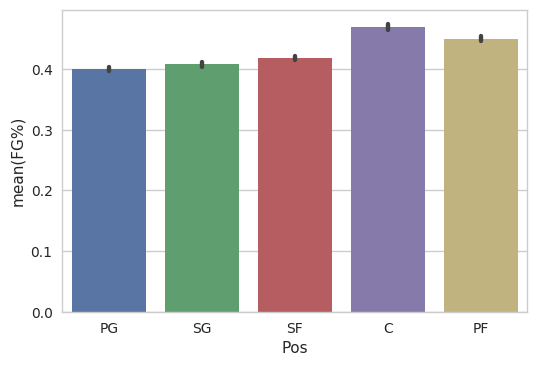

In [24]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="FG%", data=position2)
plt.show()

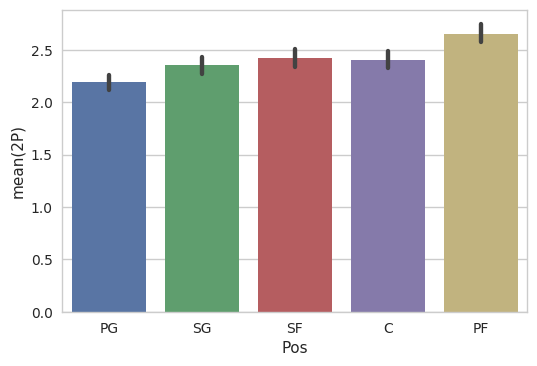

In [25]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="2P", data=position2)
plt.show()

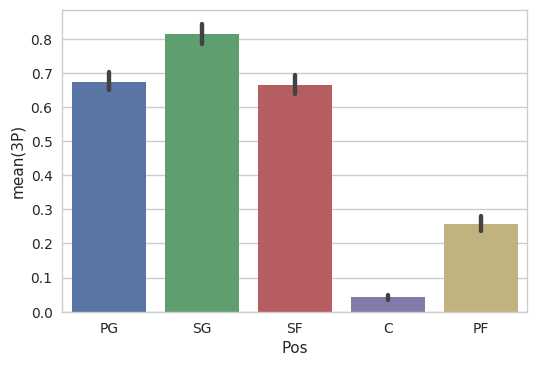

In [26]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="3P", data=position2)
plt.show()

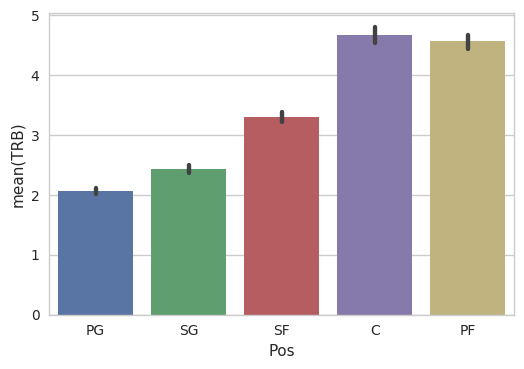

In [27]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="TRB", data=position2)
plt.show()

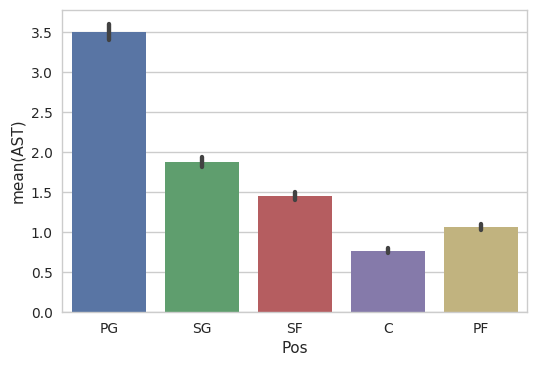

In [28]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="AST", data=position2)
plt.show()

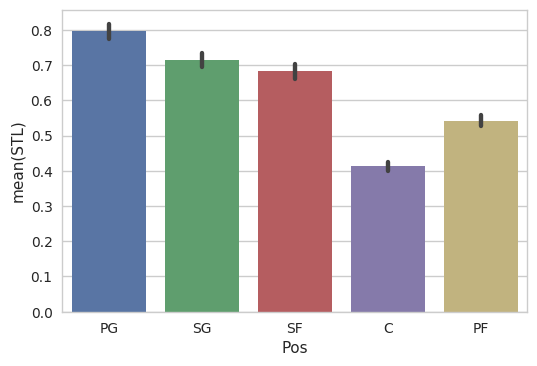

In [29]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="STL", data=position2)
plt.show()

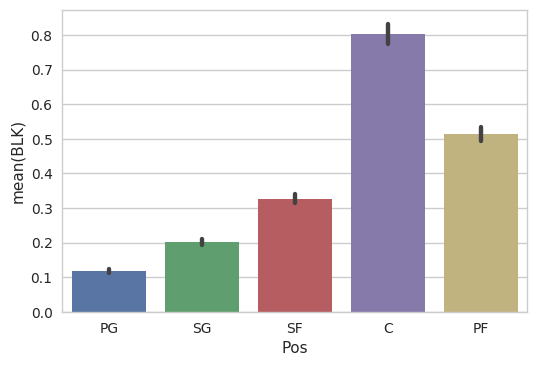

In [30]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="BLK", data=position2)
plt.show()

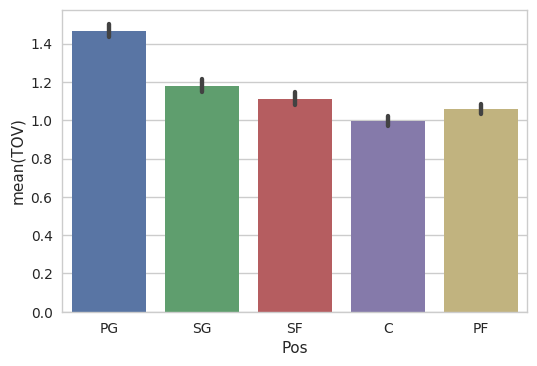

In [31]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="TOV", data=position2)
plt.show()

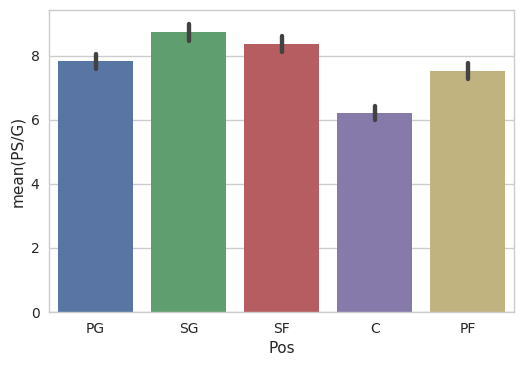

In [32]:
plt.figure(dpi=100)
sns.barplot(x="Pos", y="PS/G", data=position2)
plt.show()

### null 값 처리 

일단은 결측값이 하나라도 있는 row들은 모두 제거한다 

In [33]:
position3 = position2.dropna()
position3.isnull().sum()

Pos     0
GS      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PS/G    0
dtype: int64

In [34]:
dfy = position3[["Pos"]]
dfX = position3.iloc[:,1:]

In [35]:
test = df[19].dropna()

In [36]:
test = test[(test["Pos"] == "C") | (test["Pos"] == "PF") \
                     |(test["Pos"] == "SF") | (test["Pos"] == "SG") |(test["Pos"] == "PG")]

In [37]:
test_y = test[["Pos"]]
test_X = test.iloc[:,1:]

# 나이브 베이지안(multinomial)

In [38]:
from sklearn.naive_bayes import MultinomialNB
clf= MultinomialNB().fit(dfX, dfy)

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
clf.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'],
      dtype='|S2')

In [40]:
clf.class_count_

array([ 1051.,  1579.,  2042.,  1776.,  1930.])

In [41]:
clf.predict_proba([test_X.iloc[8,:]])

array([[ 0.31988089,  0.60139348,  0.00534023,  0.05997642,  0.01340898]])

In [42]:
test_y.iloc[8,:]["Pos"]

'PF'

In [43]:
clf.predict_proba([test_X.iloc[38,:]])

array([[ 0.00057995,  0.04771129,  0.29247028,  0.1778003 ,  0.48143819]])

In [44]:
test_y.iloc[38,:]["Pos"]

'SG'

In [45]:
clf.predict_proba([test_X.iloc[25, :]])

array([[ 0.00414383,  0.10535058,  0.45641463,  0.13556336,  0.29852759]])

In [46]:
test_y.iloc[25,:]["Pos"]

'PG'

In [47]:
pred = []
pos = ["C", "PF", "PG", "SF", "SG"]
for i in range(len(test_X)):
    pred.append(pos[clf.predict_proba([test_X.iloc[i, :]]).argmax()])

In [48]:
from sklearn.metrics import confusion_matrix

y_true = test_y
y_pred = pred
confusion_matrix(y_true, y_pred)

array([[23, 40,  0,  7,  4],
       [13, 38,  0, 33, 24],
       [ 0,  1, 77,  3, 34],
       [ 4,  8,  3, 40, 57],
       [ 1,  6, 11, 24, 79]])

In [49]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.56      0.31      0.40        74
         PF       0.41      0.35      0.38       108
         PG       0.85      0.67      0.75       115
         SF       0.37      0.36      0.37       112
         SG       0.40      0.65      0.50       121

avg / total       0.52      0.48      0.49       530



In [50]:
print(accuracy_score(y_true, y_pred))

0.484905660377


------------------

# LDA, QDA

## LDA

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(dfX, dfy)

In [52]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = lda.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[38, 27,  0,  9,  0],
       [15, 30,  3, 55,  5],
       [ 0,  0, 71,  6, 38],
       [ 3,  7,  5, 68, 29],
       [ 0,  4, 13, 26, 78]])

In [53]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.68      0.51      0.58        74
         PF       0.44      0.28      0.34       108
         PG       0.77      0.62      0.69       115
         SF       0.41      0.61      0.49       112
         SG       0.52      0.64      0.58       121

avg / total       0.56      0.54      0.54       530



In [54]:
print(accuracy_score(y_true, y_pred))

0.537735849057


## QDA

In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(dfX, dfy)

In [56]:
pred = []
pos = ["C", "PF", "PG", "SF", "SG"]
for i in range(len(test_X)):
    pred.append(pos[model.predict_proba([test_X.iloc[i, :]]).argmax()])

In [57]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = pred
confusion_matrix(y_true, y_pred)

array([[43, 21,  0,  9,  1],
       [20, 27,  2, 39, 20],
       [ 1,  0, 77,  4, 33],
       [ 2, 12,  5, 44, 49],
       [ 2,  1, 18, 23, 77]])

In [58]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.63      0.58      0.61        74
         PF       0.44      0.25      0.32       108
         PG       0.75      0.67      0.71       115
         SF       0.37      0.39      0.38       112
         SG       0.43      0.64      0.51       121

avg / total       0.52      0.51      0.50       530



In [59]:
print(accuracy_score(y_true, y_pred))

0.505660377358


----------------

# OvR, OvO

In [60]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression().fit(dfX, dfy)
model2 = OneVsRestClassifier(LogisticRegression()).fit(dfX, dfy)
model3 = OneVsOneClassifier(LogisticRegression()).fit(dfX, dfy)

In [61]:
pred = pd.DataFrame(model1.predict(test_X), columns=["prediction"])

In [62]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = pred
confusion_matrix(y_true, y_pred)

array([[39, 28,  0,  7,  0],
       [13, 38,  2, 46,  9],
       [ 0,  0, 91,  4, 20],
       [ 3, 16,  4, 46, 43],
       [ 0,  6, 15, 26, 74]])

In [63]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.71      0.53      0.60        74
         PF       0.43      0.35      0.39       108
         PG       0.81      0.79      0.80       115
         SF       0.36      0.41      0.38       112
         SG       0.51      0.61      0.55       121

avg / total       0.55      0.54      0.54       530



In [64]:
print(accuracy_score(y_true, y_pred))

0.543396226415


## OvR 

In [65]:
pred = pd.DataFrame(model2.predict(test_X), columns=["prediction"])

In [66]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = pred
confusion_matrix(y_true, y_pred)

array([[39, 28,  0,  7,  0],
       [13, 38,  2, 46,  9],
       [ 0,  0, 91,  4, 20],
       [ 3, 16,  4, 46, 43],
       [ 0,  6, 15, 26, 74]])

In [67]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.71      0.53      0.60        74
         PF       0.43      0.35      0.39       108
         PG       0.81      0.79      0.80       115
         SF       0.36      0.41      0.38       112
         SG       0.51      0.61      0.55       121

avg / total       0.55      0.54      0.54       530



In [68]:
print(accuracy_score(y_true, y_pred))

0.543396226415


## OvO

In [69]:
pred = pd.DataFrame(model3.predict(test_X), columns=["prediction"])

In [70]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = pred
confusion_matrix(y_true, y_pred)

array([[37, 31,  0,  6,  0],
       [ 9, 55,  1, 40,  3],
       [ 0,  0, 82,  4, 29],
       [ 2, 21,  0, 57, 32],
       [ 0,  5, 12, 26, 78]])

In [71]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.77      0.50      0.61        74
         PF       0.49      0.51      0.50       108
         PG       0.86      0.71      0.78       115
         SF       0.43      0.51      0.47       112
         SG       0.55      0.64      0.59       121

avg / total       0.61      0.58      0.59       530



In [72]:
print(accuracy_score(y_true, y_pred))

0.583018867925


# SVM

## 서포트 벡터 머신

In [73]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(dfX, dfy)

In [74]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = model.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[35, 33,  0,  6,  0],
       [ 6, 55,  1, 44,  2],
       [ 0,  0, 79,  4, 32],
       [ 1, 19,  1, 59, 32],
       [ 0,  4, 12, 27, 78]])

In [75]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

          C       0.83      0.47      0.60        74
         PF       0.50      0.51      0.50       108
         PG       0.85      0.69      0.76       115
         SF       0.42      0.53      0.47       112
         SG       0.54      0.64      0.59       121

avg / total       0.61      0.58      0.58       530



In [76]:
print(accuracy_score(y_true, y_pred))

0.577358490566


## 커널 서포트 벡터 머신 

In [120]:
#from sklearn.svm import SVC
#model = SVC(kernel='poly', degree=2, gamma=1).fit(dfX, dfy)

#### 엥?

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2, gamma=1).fit(dfX, dfy)

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = model.predict(test_X)
confusion_matrix(y_true, y_pred)

In [ ]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
print(accuracy_score(y_true, y_pred))

-------------------

## 클러스터링

In [77]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8).fit(dfX)
clusdf = dfX
clusdf["cluster"] = model.labels_

In [78]:
clusdf.groupby(["cluster"]).mean()

,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,58.043924,5.206149,11.537628,0.453353,0.829868,2.349488,0.280280,4.373792,9.189019,0.475960,0.489966,2.665886,3.475842,0.762776,1.368814,3.999414,5.366179,3.221083,1.060908,0.615227,1.951977,2.461347,13.909224
1,1.333104,1.359574,3.391440,0.396349,0.304985,0.961327,0.253388,1.054142,2.430457,0.427801,0.437824,0.618116,0.868408,0.706709,0.485871,1.259780,1.743451,0.978996,0.386043,0.177862,0.659471,1.234960,3.636714
2,42.533046,3.988362,9.015805,0.445144,0.700718,1.976868,0.278006,3.285776,7.036351,0.467157,0.483010,1.890230,2.493391,0.748297,1.248851,3.360201,4.608621,2.478736,0.896839,0.478448,1.558908,2.362787,10.567385
3,76.595773,4.492734,9.826552,0.460573,0.870806,2.359049,0.285374,3.622061,7.465258,0.484863,0.503054,2.101717,2.770013,0.755843,1.399868,3.974769,5.373052,3.183355,1.021136,0.625231,1.712946,2.492734,11.956803
4,4.096708,3.532510,8.171605,0.434870,0.768210,2.178292,0.297433,2.764815,5.992181,0.461030,0.480028,1.751235,2.287140,0.765686,0.916975,2.516255,3.430041,1.950000,0.715329,0.325617,1.322634,2.005761,9.580658
5,14.503086,2.575103,6.001543,0.431119,0.536934,1.561214,0.273888,2.037654,4.440226,0.457770,0.473376,1.157819,1.554630,0.738241,0.849897,2.287757,3.134568,1.664609,0.645885,0.331687,1.087243,1.918210,6.847428
6,76.522581,7.630323,16.394355,0.467492,1.015161,2.837903,0.304865,6.618871,13.555806,0.487968,0.497756,4.501129,5.734839,0.788429,1.617258,5.051935,6.668226,4.136129,1.226613,0.745000,2.596290,2.567419,20.777581
7,26.514954,3.945644,9.023277,0.438051,0.708192,2.031730,0.281746,3.238362,6.991678,0.461912,0.477166,1.926398,2.523537,0.756956,1.079064,3.028869,4.106502,2.548505,0.849675,0.405592,1.576983,2.239532,10.524967


#### 단순 클러스터링으론 별 의미가 없어보임 (에이스랑 주전, 비주전으로만 나눠지는 느낌)

------------------


## decision tree

In [79]:
del dfX["cluster"]

In [89]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=5).fit(dfX, dfy)

In [90]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = tree1.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[30, 23,  2, 16,  3],
       [ 7, 19,  1, 65, 16],
       [ 0,  0, 84,  5, 26],
       [ 0,  3,  5, 73, 31],
       [ 0,  0, 23, 44, 54]])

In [91]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.81      0.41      0.54        74
         PF       0.42      0.18      0.25       108
         PG       0.73      0.73      0.73       115
         SF       0.36      0.65      0.46       112
         SG       0.42      0.45      0.43       121

avg / total       0.53      0.49      0.48       530

accuracy :  0.490566037736


In [92]:
import sys
sys.path.append('/Users/sinsanghun/anaconda/lib/python2.7/site-packages')

import StringIO
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(classifier):
    dot_buf = StringIO.StringIO() 
    export_graphviz(classifier, out_file=dot_buf, feature_names=dfX.columns)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)


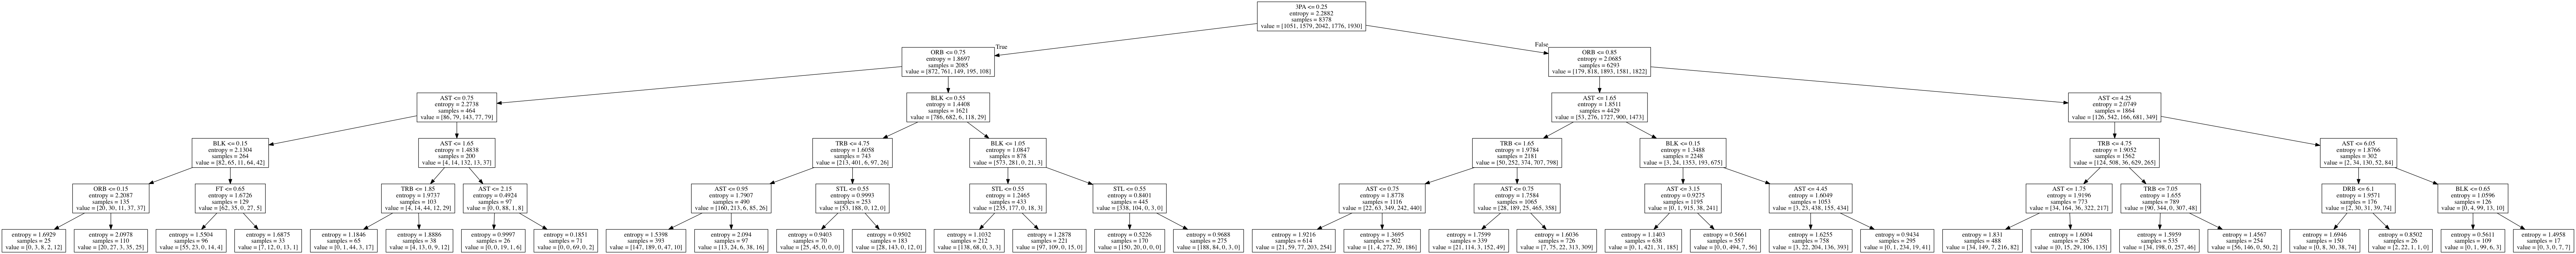

In [93]:
draw_decision_tree(tree1)

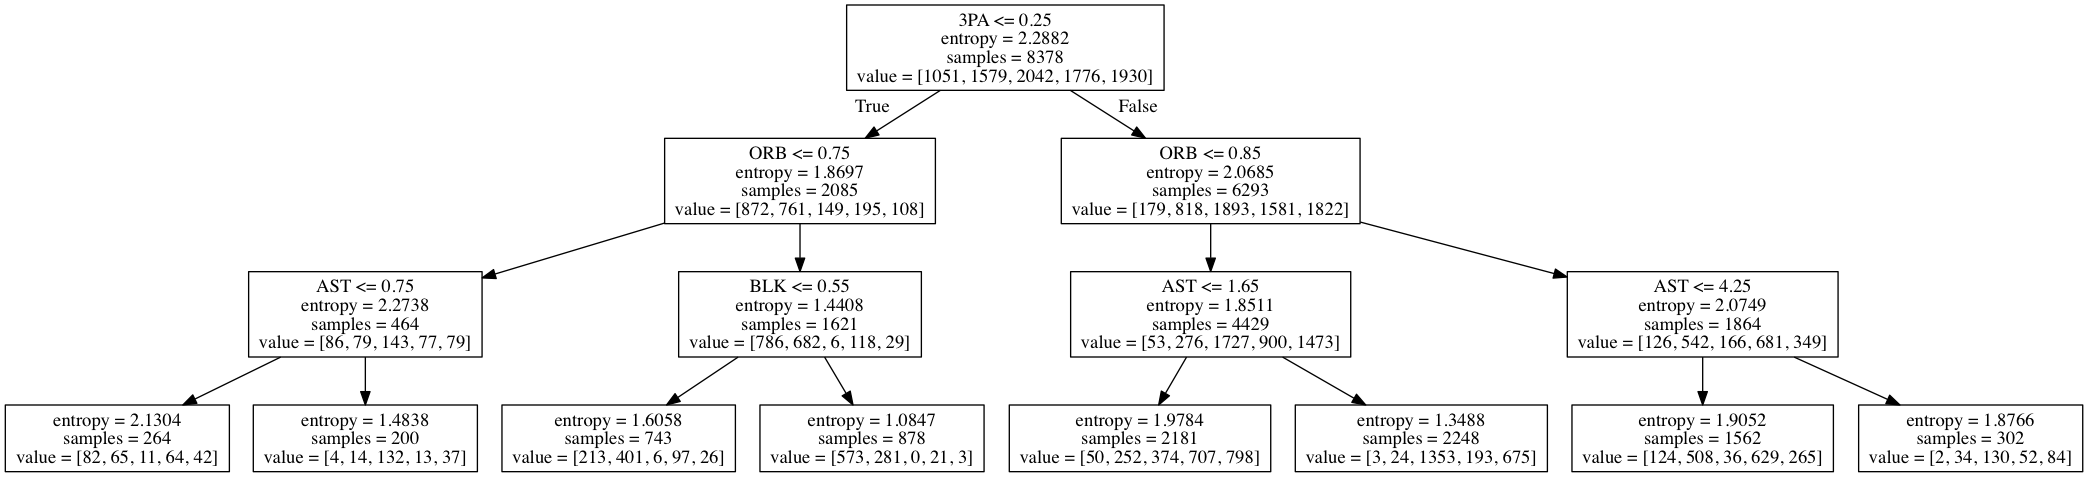

In [94]:
from sklearn.tree import DecisionTreeClassifier

tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(dfX, dfy)
draw_decision_tree(tree2)

# 퍼셉트론

In [100]:
from sklearn.linear_model import Perceptron

In [171]:
model = Perceptron(n_iter=1000, eta0=0.1).fit(dfX, dfy)

In [172]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = model.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[20, 10,  0, 44,  0],
       [ 7, 25,  1, 74,  1],
       [ 0,  0, 83, 19, 13],
       [ 1,  3,  2, 97,  9],
       [ 0,  5, 13, 72, 31]])

In [173]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.71      0.27      0.39        74
         PF       0.58      0.23      0.33       108
         PG       0.84      0.72      0.78       115
         SF       0.32      0.87      0.46       112
         SG       0.57      0.26      0.35       121

avg / total       0.60      0.48      0.47       530

accuracy :  0.483018867925


# SGD classifier

In [174]:
from sklearn.linear_model import SGDClassifier
modelSGD = SGDClassifier(loss="log", n_iter=1000, random_state=1).fit(dfX, dfy)

In [175]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = modelSGD.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[ 34,  37,   0,   1,   2],
       [ 13,  56,   3,  26,  10],
       [  0,   1, 100,   3,  11],
       [  2,  24,   6,  25,  55],
       [  0,   6,  22,  14,  79]])

In [176]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.69      0.46      0.55        74
         PF       0.45      0.52      0.48       108
         PG       0.76      0.87      0.81       115
         SF       0.36      0.22      0.28       112
         SG       0.50      0.65      0.57       121

avg / total       0.55      0.55      0.54       530

accuracy :  0.554716981132


# 다수결 방법

In [206]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators = [("lda", lda),
                                          ("NB", clf),
                                         ("SGD", modelSGD)],
                           voting = "hard", weights = [1, 1, 2])

ens = ensemble.fit(dfX, dfy)

In [211]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = ens.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[ 34,  37,   0,   2,   1],
       [ 15,  56,   3,  30,   4],
       [  0,   1, 100,   3,  11],
       [  2,  24,   6,  42,  38],
       [  0,   6,  22,  20,  73]])

In [212]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.67      0.46      0.54        74
         PF       0.45      0.52      0.48       108
         PG       0.76      0.87      0.81       115
         SF       0.43      0.38      0.40       112
         SG       0.57      0.60      0.59       121

avg / total       0.57      0.58      0.57       530

accuracy :  0.575471698113


# 배깅

In [247]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(dfX, dfy)
modelbag = BaggingClassifier(DecisionTreeClassifier(), 
                             n_estimators=20,
                             max_samples=0.75,
                             bootstrap_features=True).fit(dfX, dfy)

In [248]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = tree.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[33, 30,  1, 10,  0],
       [18, 55,  0, 27,  8],
       [ 0,  1, 82,  3, 29],
       [ 5, 28,  3, 44, 32],
       [ 2,  6, 21, 33, 59]])

In [249]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.57      0.45      0.50        74
         PF       0.46      0.51      0.48       108
         PG       0.77      0.71      0.74       115
         SF       0.38      0.39      0.38       112
         SG       0.46      0.49      0.47       121

avg / total       0.52      0.52      0.52       530

accuracy :  0.515094339623


In [250]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = modelbag.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[40, 28,  0,  6,  0],
       [ 9, 52,  2, 42,  3],
       [ 0,  0, 87,  4, 24],
       [ 1, 19,  3, 64, 25],
       [ 0,  4, 20, 27, 70]])

In [251]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.80      0.54      0.65        74
         PF       0.50      0.48      0.49       108
         PG       0.78      0.76      0.77       115
         SF       0.45      0.57      0.50       112
         SG       0.57      0.58      0.58       121

avg / total       0.61      0.59      0.59       530

accuracy :  0.590566037736


# 랜덤 포레스트

In [254]:
from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

n_classes = 3
n_estimators = 30
plot_colors = "ryb"
cmap = plt.cm.RdYlBu
plot_step = 0.02  
RANDOM_SEED = 13


In [263]:
random = RandomForestClassifier(max_depth=5, n_estimators=30).fit(dfX, dfy)

from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = random.predict(test_X)
confusion_matrix(y_true, y_pred)

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([[34, 24,  0, 16,  0],
       [ 8, 23,  2, 65, 10],
       [ 0,  0, 95,  1, 19],
       [ 1,  3,  3, 63, 42],
       [ 0,  2, 20, 15, 84]])

In [264]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.79      0.46      0.58        74
         PF       0.44      0.21      0.29       108
         PG       0.79      0.83      0.81       115
         SF       0.39      0.56      0.46       112
         SG       0.54      0.69      0.61       121

avg / total       0.58      0.56      0.55       530

accuracy :  0.564150943396


In [266]:
extra = ExtraTreesClassifier(max_depth=5, n_estimators=30).fit(dfX, dfy)

from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = extra.predict(test_X)
confusion_matrix(y_true, y_pred)

/Users/sinsanghun/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


array([[ 26,  33,   0,  13,   2],
       [  2,  32,   7,  42,  25],
       [  0,   0, 105,   0,  10],
       [  1,   6,  17,  40,  48],
       [  0,   5,  39,   6,  71]])

In [267]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.90      0.35      0.50        74
         PF       0.42      0.30      0.35       108
         PG       0.62      0.91      0.74       115
         SF       0.40      0.36      0.38       112
         SG       0.46      0.59      0.51       121

avg / total       0.53      0.52      0.50       530

accuracy :  0.516981132075


### 변수 중요도 알아보기 

In [301]:
importances = extra.feature_importances_
indices = np.argsort(importances)[::-1]
# [::-1]을 통해서 내림차순으로 정렬

In [307]:
print("FEATURE RANKING ")
num = 1
for i in indices:
    print(str(num) + "." ,dfX.columns[i], (importances[i]*100).round(2), "%")
    num = num + 1

FEATURE RANKING 
1. AST 18.91 %
2. BLK 11.28 %
3. DRB 11.09 %
4. TRB 10.43 %
5. ORB 8.84 %
6. 3P 8.34 %
7. 3P% 6.43 %
8. 3PA 5.98 %
9. PF 3.05 %
10. TOV 2.42 %
11. FG% 2.28 %
12. STL 1.77 %
13. GS 1.43 %
14. 2PA 1.15 %
15. FGA 1.04 %
16. 2P 0.88 %
17. FG 0.81 %
18. 2P% 0.8 %
19. FT 0.79 %
20. FT% 0.65 %
21. PS/G 0.65 %
22. eFG% 0.64 %
23. FTA 0.35 %


# Ada Boost

In [347]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
                                                     algorithm="SAMME",
                                                     n_estimators=20).fit(dfX, dfy)

In [348]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = model_ada.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[32, 34,  0,  8,  0],
       [ 8, 52,  0, 44,  4],
       [ 0,  2, 78,  4, 31],
       [ 0, 18,  2, 61, 31],
       [ 0,  3, 16, 32, 70]])

In [349]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.80      0.43      0.56        74
         PF       0.48      0.48      0.48       108
         PG       0.81      0.68      0.74       115
         SF       0.41      0.54      0.47       112
         SG       0.51      0.58      0.54       121

avg / total       0.59      0.55      0.56       530

accuracy :  0.552830188679


In [350]:
from sklearn.metrics import confusion_matrix
for i in range(len(model_ada.estimators_)):
    y_true = test_y
    y_pred = model_ada.estimators_[i].predict(test_X)
    print(confusion_matrix(y_true, y_pred))
    print("accuracy : ", accuracy_score(y_true, y_pred))
    print("")

[[33 34  0  6  1]
 [ 6 56  0 39  7]
 [ 0  0 85  1 29]
 [ 4 20  2 53 33]
 [ 2  8 15 27 69]]
accuracy :  0.558490566038

[[34 23  0 15  2]
 [13 47  2 36 10]
 [ 0  3 50  6 56]
 [ 5 20  2 51 34]
 [ 0  5 13 54 49]]
accuracy :  0.435849056604

[[16 44  0 12  2]
 [12 41  0 39 16]
 [ 0  3 59 17 36]
 [ 4 26  3 39 40]
 [ 3  6 19 42 51]]
accuracy :  0.388679245283

[[25 33  0 12  4]
 [17 35  3 46  7]
 [ 0  3 61 10 41]
 [ 5 15  7 58 27]
 [ 1  6 27 50 37]]
accuracy :  0.407547169811

[[29 25  1 14  5]
 [16 47  6 32  7]
 [ 0  3 56 13 43]
 [ 1 25  3 50 33]
 [ 6  6 14 38 57]]
accuracy :  0.450943396226

[[30 27  1 10  6]
 [19 34  1 29 25]
 [ 2  4 58 11 40]
 [ 4 12  6 48 42]
 [ 2  7 35 28 49]]
accuracy :  0.41320754717

[[31 27  0 14  2]
 [24 47  2 25 10]
 [ 0  5 51 16 43]
 [ 4 28 10 48 22]
 [ 1 11 19 47 43]]
accuracy :  0.415094339623

[[24 33  1 13  3]
 [15 36  2 43 12]
 [ 1  1 44  9 60]
 [ 5 23  5 44 35]
 [ 3  9 10 32 67]]
accuracy :  0.405660377358

[[45 18  1  4  6]
 [23 37  3 28 17]
 [ 0  6 70 13

# Gradient Boost

In [351]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=7).fit(dfX, dfy)

In [352]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = model_grad.predict(test_X)
confusion_matrix(y_true, y_pred)

array([[35, 32,  0,  7,  0],
       [ 9, 68,  1, 26,  4],
       [ 0,  0, 87,  1, 27],
       [ 1, 16,  0, 62, 33],
       [ 1,  1, 13, 40, 66]])

In [353]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.76      0.47      0.58        74
         PF       0.58      0.63      0.60       108
         PG       0.86      0.76      0.81       115
         SF       0.46      0.55      0.50       112
         SG       0.51      0.55      0.53       121

avg / total       0.62      0.60      0.61       530

accuracy :  0.6


# XGboost (dfX2 사용)

In [364]:
dfX2 = dfX[["AST", "BLK", "TRB", "3P", "PF", "TOV", "FG%", "STL"]]
test_X2 = test_X[["AST", "BLK", "TRB", "3P", "PF", "TOV", "FG%", "STL"]]

In [368]:
import xgboost

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=3).fit(dfX2, dfy)

In [369]:
from sklearn.metrics import confusion_matrix
y_true = test_y
y_pred = model_xgb.predict(test_X2)
confusion_matrix(y_true, y_pred)

array([[38, 28,  0,  8,  0],
       [10, 42,  1, 49,  6],
       [ 0,  0, 90,  1, 24],
       [ 2, 11,  2, 63, 34],
       [ 0,  5, 13, 19, 84]])

In [370]:
from sklearn.metrics import *

target_names = ["C", "PF", "PG", "SF", "SG"]
print(classification_report(y_true, y_pred, target_names=target_names))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          C       0.76      0.51      0.61        74
         PF       0.49      0.39      0.43       108
         PG       0.85      0.78      0.81       115
         SF       0.45      0.56      0.50       112
         SG       0.57      0.69      0.62       121

avg / total       0.61      0.60      0.60       530

accuracy :  0.598113207547


In [363]:
dfX.head()

,GS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,0.0,3.3,8.8,0.377,0.2,1.0,0.161,3.2,7.8,0.405,0.386,0.5,0.5,1.000,0.2,1.0,1.2,1.9,0.5,0.0,0.6,1.0,7.3
1,16.0,2.4,6.1,0.403,0.1,0.3,0.211,2.4,5.7,0.414,0.409,1.4,2.1,0.672,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4
2,82.0,8.0,16.4,0.485,0.3,0.6,0.412,7.7,15.8,0.488,0.493,6.1,7.8,0.784,2.8,4.3,7.1,2.6,1.1,0.9,3.1,2.5,22.3
3,22.0,2.9,6.7,0.428,1.1,2.9,0.375,1.8,3.7,0.469,0.510,1.3,1.7,0.784,0.3,2.2,2.4,3.5,1.2,0.2,1.9,1.6,8.1
4,3.0,1.6,3.9,0.414,0.5,1.7,0.313,1.1,2.2,0.494,0.483,0.7,1.0,0.676,0.2,1.1,1.3,1.9,0.7,0.1,1.3,1.4,4.5
